## Libraries

In [1]:
import tempfile
import math
import os
from subprocess import call
import matplotlib.pyplot as plt
from f90nml import *
from array import *
import numpy as np
import pandas as pd 
import seaborn as sns
from statistics import *
import shutil
import sys
import time
from matplotlib.ticker import FormatStrFormatter

#read in printFolder, makeDefNameList, newFolder, deleteFolder, readOutput from coreFunctions.py
from coreFunctions import *

#read in plotting functionality from plottingFunctions.py
from plottingFunctions import *

call("rm -rf tmp*",shell=True)

dfModel = []#will contain output from our model

## Enter Custom Inputs, then Run the Model

Equilibrium Reached at Temp=287.09. At time=22.0
Final Temp(K): 290.5235596
Final Temp(F): 63.27

rGrowth0/fragility = 0.004


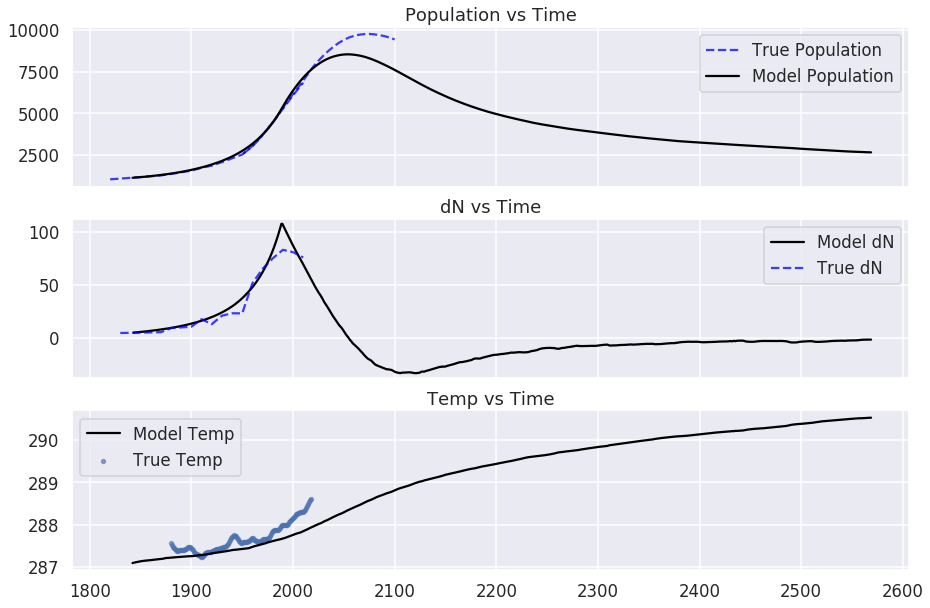

In [2]:
nameList = makeDefNamelist() #make namelist
#-------------------------------------Boolean Inputs--------------------------------------------------
plot=False;#make the fancy plots?
save=True;#save the file
life=False;
coupled=True
analyze = True #whether or not to analyze the population parts of model
nameList['ebm']['lverbose']=False     #controls terminal output, used for debugging
#-------------------------------------Constant Inputs-------------------------------------------------
driverName = "driver.exe" 
newA=1                               #Change distance  (AU)
runTime=750                           #Change runtime   (years)
nameList['ebm']['relsolcon']=newA**-2 #inverse square law for solar flux
nameList['ebm']['rBirth0']=0.019;     #Initial Birth Rate
nameList['ebm']['rDeath0']=0.015;     #Initial Death Rate
nameList['ebm']['Nmax']=13000;        #Maximum Population
nameList['ebm']['dpco2']=6.3e-5;           #Initial Technological Abilities
nameList['ebm']['dtemp']=1.73 #Fragility of Civilization
#------------------------------------Run the Model----------------------------------------------------
dfModel = runModel(nameList, coupled, runTime, plot, save, analyze, driverName)
#------------------------------------Plot the Results----------------------------------------------
#growthRates(dfModel,True) #true to compare growth rates
dfTemp = pd.read_csv('anomaly.csv');#data from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
dfPopCo2 = pd.read_csv('world_stats.csv');#data from Frank, Adam, and Woodruff Sullivan.
print("rGrowth0/fragility = " + str(  (nameList['ebm']['rBirth0']-nameList['ebm']['rDeath0'])/nameList['ebm']['fragility']))
compareModelOutput(dfModel,dfTemp,dfPopCo2)#compare the models output to true data
call("echo End of Python Notebook Reached", shell=True);

## Model Analysis

In [3]:
# dfTemp = pd.read_csv('anomaly.csv');#data from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
# dfPopCo2 = pd.read_csv('world_stats.csv');#data from Frank, Adam, and Woodruff Sullivan.
# plotModelInput(nameList)#plot the temperature dependence on the growth rate
# plotTruePopCo2(dfPopCo2) #plot true population values vs pco2
# compareModelOutput(dfModel,dfTemp,dfPopCo2)#compare the models output to true data

In [4]:
dfModel['today_time'] = np.asarray(dfModel['time_yrs'])+1820
#dfModel.iloc[150:300];
print(int(dfModel[  np.floor(dfModel.today_time) == 2020   ]['pop']))

7749
